In [1]:
!pip install dmba

from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pylab as plt

import dmba
from dmba import classificationSummary, gainsChart

%matplotlib inline

## 나이브 베이즈 분류기
### 특징
* 모델 중심이 아닌 데이터 중심
* 데이터에 대한 가정을 하지 않음
* 범주형 예측자료에만 작동: 수치형 자료일 경우에는 범주형으로 변환하여 사용
* 대용량 데이터 자료에서 작동 가능

### 종류
* 정확한 베이즈 분류기(Exact Bayes Classifier)
    * 조건부 확률과 베이즈 정리에 기반
    * 독립변수가 많으면 계산이 어려움
* 나이브 베이즈 분류기(Naive Bayes Classifier)
    * 독립변수가 많을 때 간단히 계산

## 확률의 개념
### 확률의 개념
* 확률=가능성%
* 비슷한 현상이 반복해서 일어날 경우에 어떤 사건이 발생할 가능성을 0과 1 사이의 숫자로 표현한 것
### 확률의 부여
    1. 고전적 방법
    2. 상대도수 방법
    3. 주관적 방법
### 확률의 기본조건(확률 부여 방법과 관계 없이 모두 만족)
1. 어떤 표본점에 대해서도 확률은 0과 1사이의 값을 가짐
#### $$0<=P(E_i)<=1 $$ for all
2. 확률의 합은 반드시 1이 되어야 함
#### $$P(E_1)+P(E_2)+...+P(E_n)=1$$

### 확률의 부여 
#### 1. 고전적 방법
* 모든 결과가 똑같은 가능성을 가짐(equally likely)
$$P(E_i)=\frac{1}{n}$$
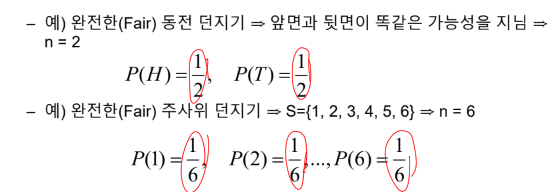
* 확률에 대한 사전 정보가 전혀 없는 상황에 적용할 수 있음
    * 일종의 벤치마킹이나 출발점으로 생각할 수 있음

#### 2. 상대도수 방법
* 상대도수(소수점으로 나타낸 값)를 각 결과의 확률로 부여
    * 과거 자료가 존재하는 경우에 적절한 방법임
    * 예) 루카스 도구 렌탈 샵: 샵에서 매일 빌려가는 자동차 광택제 수에 대한 확률의 부여

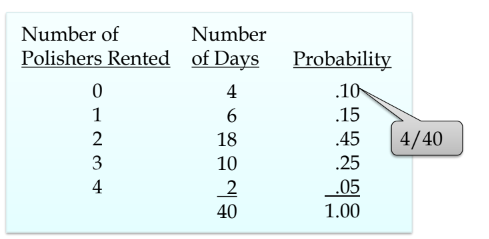

#### 3. 주관적 방법
* 고전적 방법도 적절하지 않고 과거 자료도 없는 경우
* 개인의 주관적인 신뢰의 정도를 확률로 부여
    * 예) Tom과 Judy가 집을 사기 위해 오퍼를 냄-> 두 가지 명확히 정의된 결과를 낳는 실험
        * E1=오퍼가 받아들여짐
        * E2=오퍼가 받아들여지지 않음
        * Judy-> P(E1)=0.8, P(E2)=0.2
        * Tom-> P(E1)=0.6, P(E2)=0.4
* 특히, 확률의 2가지 조건이 만족되는지에 대해 주의
    * 만약 Tom이 나는 우리의 오퍼가 받아들여질 것을 120% 확신한다고 말하면-> P(E1)=1.2>1
    * 만약 Tom이 우리의 오퍼가 받아들여질지 잘 모르겠다는 조심스러운 태도를 취하면서 P(E1)=0.4, P(E2)=0.4라고 하면-> P(E1)+P(E2)=0.4+0.4=0.8!=1


## 조건부 확률
* 한 사상이 일어났다는 전제 하에서 다른 사상이 일어날 확률
* B가 발생했다는 전제 하에 사상 A가 일어날 조건부 확률은
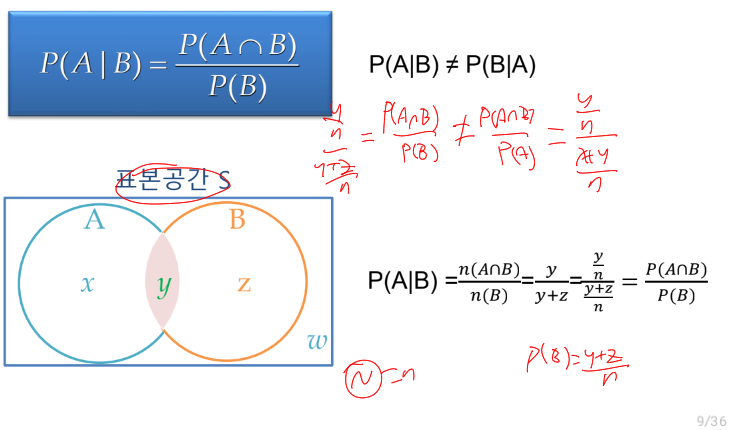

## 베이즈 정리
### 베이즈 정리
* 사전(prior) 확률 (P(H))과 사후 확률(posterior) 확률(P(H|E)) 사이의 관계를 조건부 확률을 이용해서 계산하는 확률 이론
* 새로운 정보를 토대로 어떤 사건이 발생했다는 주장에 대한 신뢰도를 갱신해 나가는 방법

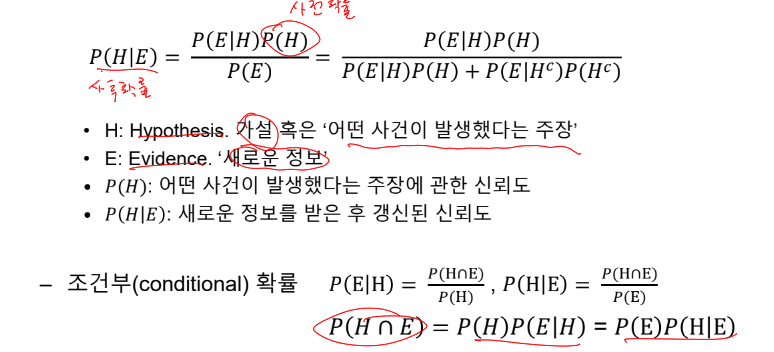

## 이론의 적용
### 조건부 확률
* 해당 레코드의 예측 변수 값들이 $x_1, x_2, ..., x_p$라고 할 때, 그 레코드가 클래스 $C_i$에 속할 확률을 알아볼 것
* 일반적으로 예측변수들의 값 $x_1, x_2, ..., x_p$에 대한 m개의 클래스 $C_1, C_2, ..., C_m$의 결과에 대해서 다음을 계산함
$$P(C_i|x_1, ..., x_p)$$
* 각 클래스에 속할 확률을 계산하고 나서 가장 큰 확률의 클래스로 레코드를 분류하거나 관심 클래스로 배정해야 할지 결정하기 위해 컷오프 확률을 사용함

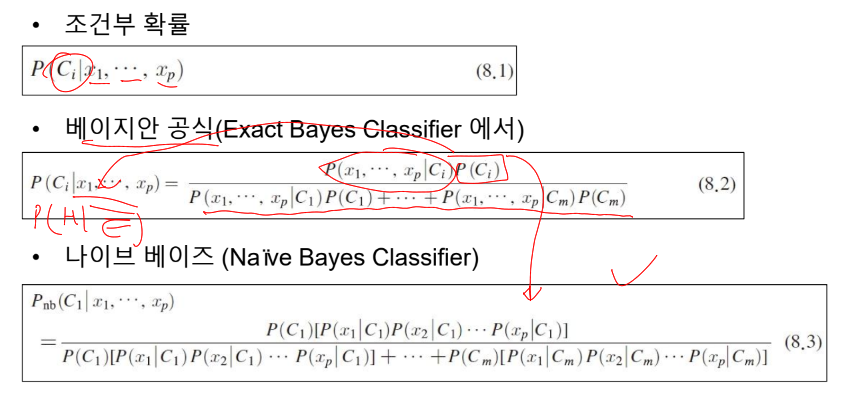

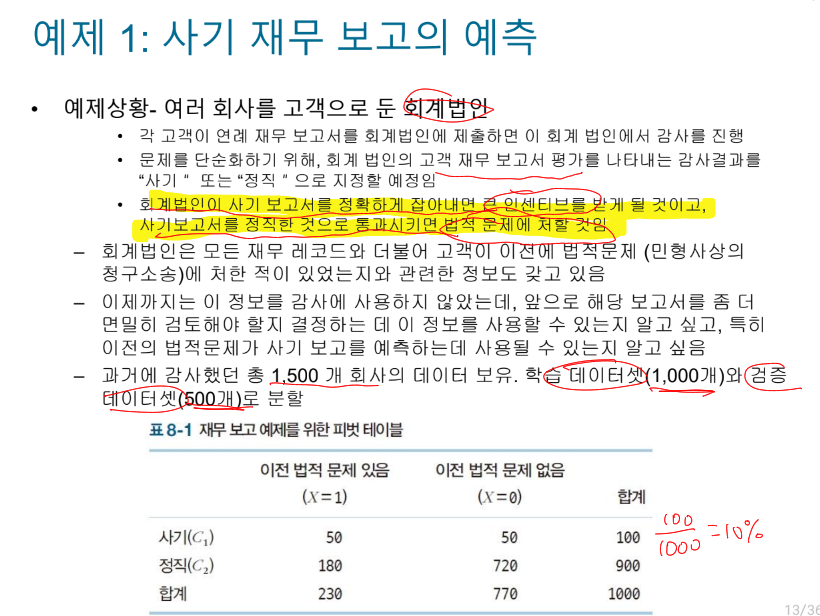
## 완전한(정확한) 베이지안 분류기의 적용
### '가장 가능성 있는 클래스에 배정'하는 방법의 사용
* '모든 레코드를 가장 많은 수의 클래스로 배정'하는 나이브 규칙의 결과
* 어떤 회사가 이전에 법적 문제가 있었다면 "정직" 클래스로 배정
* 이전에 법적 문제가 없었다면 "정직" 클래스로 배정

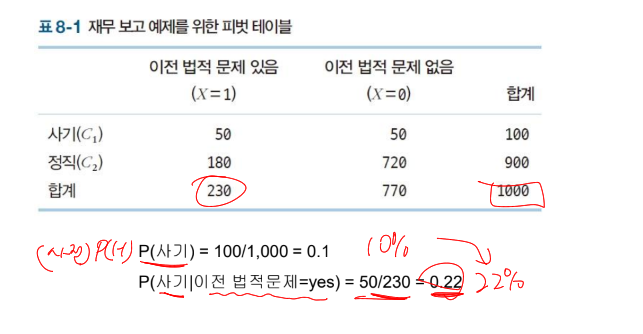

### 컷오프 확률 방법의 사용
* 예제는 사기보고(감시자를 구속시킬 수도 있는 보고)를 제대로 식별하는 데 더 큰 관심
* 접근 방법: 사기일 확률에 대한 컷오프 값을 설정하고 이 값보다 큰 모든 레코드를 사기로 분류함
    * 만약, 컷오프 값이 0.20으로 설정되었다면 P(사기|이전 볍적 문제 있음)=50/230=0.22이기 때문에 이전에 법적 문제에 처한 레코드를 사기로 분류할 것임
* 한 레코드가 $C_i$에 속할 확률을 계산하기 위한 베이지안 공식
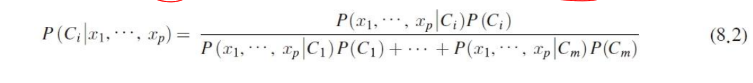

## 나이브 베이즈 기본 원리
### 나이브 베이즈 기본 원리
1. 예측 변수 프로파일이 동일한(즉, 예측 변수 값들이 동일한) 다른 모든 레코드를 찾음
2. 그 레코드들이 어떤 클래스에 속하고 어떤 클래스가 가장 일반적인지 결정
3. 그 클래스를 새로운 레코드의 답으로 함

### 컷오프 확률 방법
1. 어떤 레코드가 해당 클래스에 속한다고 간주하는 값 이상으로 관심 클래스의 컷오프 확률을 설정
2. 새로운 레코드와 동일한 예측 변수 프로파일을 갖는(즉, 예측 변수 값들이 동일한) 모든 학습 레코드들을 찾음
3. 그 레코드들이 관심 클래스에 속할 확률을 결정
4. 그 확률이 컷오프 확률보다 크면 새로운 레코드의 답을 관심 클래스로 함

## 완전한(정확한)베이지안 분류기의 적용
### 완전한(정확한)베이즈 절차의 실질적 어려움
* 예측 변수의 수가 많아지면(20개 정도만 되어도) 분류할 많은 레코드들과 정확하게 일치하는 것은 없을 것임
    * P(사기|이전 법적 문제=yes, 회사 규모=small)=1/2=0.5
    * P(사기|이전 법적 문제=no, 회사 규모=small)=데이터 없음

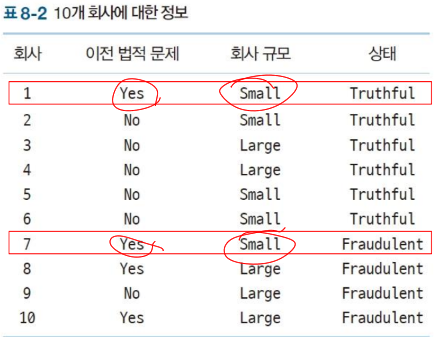

* 예측 변수의 수가 많아지면(20개 정도만 되어도) 분류할 많은 레코드들과 정확하게 일치하는 것은 없을 것임
*예) 미국 중서부에 거주하는 고수익의 히스패닉 남성으로서 지난 선거에는 투표했지만 그 이전 선거에는 투표하지 않았고 딸 셋과 아들 하나가 있으며 현재 이혼한 사람에 대한 레코드는 없을 가능성이 있음
* 해결책-> 나이브 베이즈

## 나이브 베이즈
### 나이브 베이즈
    * 더 이상 분류할 레코드와 정확히 일치하는 레코드의 확률 계산에 얽매이지 않으며, 그 대신 전체 데이터셋을 사용함
* 기본 분류 절차
    1. 예측 변수 프로파일이 동일한(즉, 예측 변수 값들이 동일한)다른 모든 레코드를 찾음
    2. 그 레코드들이 어떤 클래스에 속하고 어떤 클래스가 가장 일반적인지 결정
    3. 그 클래스를 새로운 레코드의 답으로 함
* 기본 분류 절차를 나이브 베이즈로 변경한 내용
1. C1클래스에 대해 각 예측 변수의 개별 조건부 확률 $P(x_j|C_1)$을 추정한다. 이 확률은 분류할 레코드의 예측 변수 값이 C1클래스에서 발생할 확률이다. 예를 들어, X1에 대한 이 확률은 학습 데이터셋에서 C1클래스에 속하는 레코드들의 비율을 곱한다.
2. 이 확률을 서로 곱한 후 C1클래스에 속하는 레코드들의 비율을 곱한다.
3. 모든 클래스에 대해서 단계 1과 2를 반복한다.
4. 클래스 Ci에 대해 단계 2에서 계산한 값을 모든 클래스의 값들의 합으로 나눠서 클래스 Ci의 확률을 추정한다.
5. 이 예측변수 값들에 대해 가장 큰 확률 값을 내는 클래스가 이 레코드의 답이 된다.

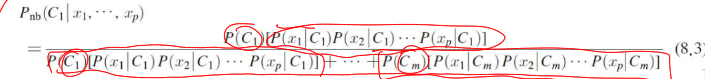

## 나이브 베이즈
### 나이브 베이즈
* 
    * 더 이상 분류할 레코드와 정확히 일치하는 레코드의 확률 계산에 얽매이지 않으며, 그 대신 전체 데이터셋을 사용함
* 조건부 독립의 나이브베이즈 가정
    * 예측변수 프로파일 $x1, x2,..., xp$를 갖는 레코드가 특정 클래스
    * $P(x1, x2, ..., xp|Ci)$내에서 나올 정확한 조건부 확률은 단순하게 개별적인 조건부 확률의 곱 $P(x1|Ci)P(x2|Ci)\times ... \times P(xp|Ci)$으로 잘 추정될 수 있다고 가정함
    * 예) 회계 사기 예에서 '작년의 금전적 손실'이 변수로 추가된다고 가정
        * 나이브 베이즈로 만든 단순 가정을 사용하면 더 이상 주어진 클래스 내에서 '이전 법적 문제'와 '작년의 금전적 손실'모두에 의해서 특정지어지는 레코드들을 찾을 필요가 없음
        * 이 둘이 독립이라고 가정하여 단순히 '이전 법적 문제'의 확률에 '작년의 금전적 손실'의 확률을 곱하면 됨

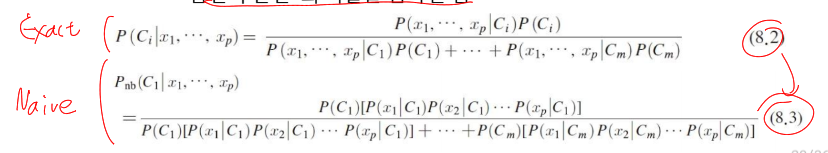

### 조건부 독립의 나이브 베이즈 가정
* 예측변수 프로파일 x1, x2, ..., xp를 갖는 레코드가 특정 클래스 P(x1, x2, ..., xp|Ci)내에서 정확한 조건부 확률은 단순하게 개별적인 조건부 확률의 곱 $P(x1|Ci)P(x2|Ci)\times ... \times P(xp|Ci)$으로 잘 추정될 수 있다고 가정함
* 실제로 이 가정에 위배되는 경우라도 이 절차가 꽤 잘 작동함
    * 보통 필요한 것이 각 레코드의 절대적으로 정확한 경향이 아니라 단지 적당히 정확한 경항의 순위이기 때문
    * 이 가정에 위배되는 경우라도 보통 레코드들의 경향에 대한 순위는 유지됨
    * 분모는 모든 클래스에 대해 동일하기 때문에 분자에만 집중하는 것으로 충분
    * 단점으로 산출되는 확률값(경향)이 순위로는 올바르지만 사용자가 기대하는 정확한 값과 동일한 척도상에 있지 않다는 점

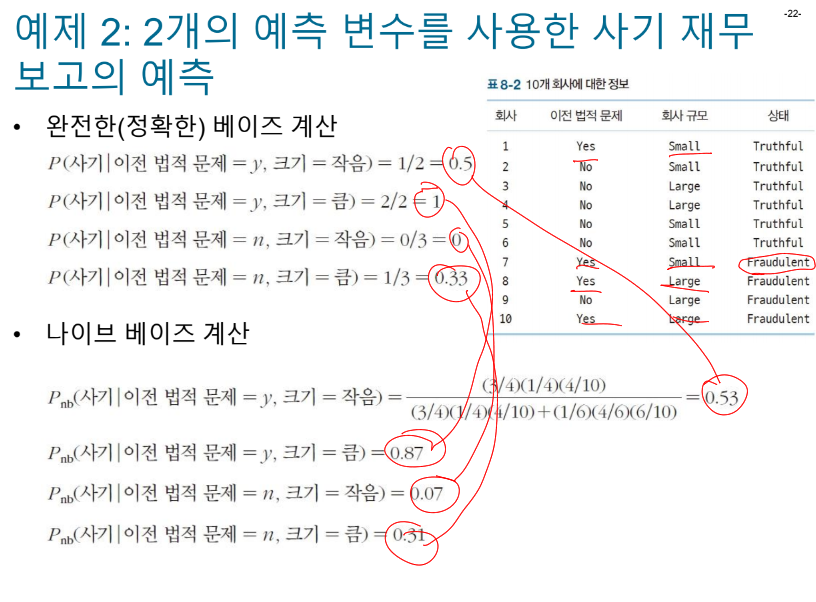

## 컷오프 확률 방법의 사용
1. 어떤 레코드가 그 클래스에 속한다고 결정하는데 사용하는 관심 클래스의 컷오프 확률을 설정한다.
2. 관심 클래스에 대해 분류할 레코드의 개별 예측 변수 값이 학습 데이터셋에 나타날 확률을 계산한다.
3. 이 확률들을 서로 곱한 후, 관심 클래스에 속하는 레코드의 비율을 곱한다.
4. 관심 클래스에 대해 단계 3에서 계산한 값을 모든 클래스에 대해 유사하게 계산한 값들의 합으로 나눠서 관심 클래스의 확률을 추정한다.
5. 이 값이 컷오프 값을 넘으면 새로운 레코드를 관심 클래스로 배정하고, 그렇지 않으면 배정하지 않는다.
6. 필요시 모델의 파라미터로 컷오프 값을 조정한다.

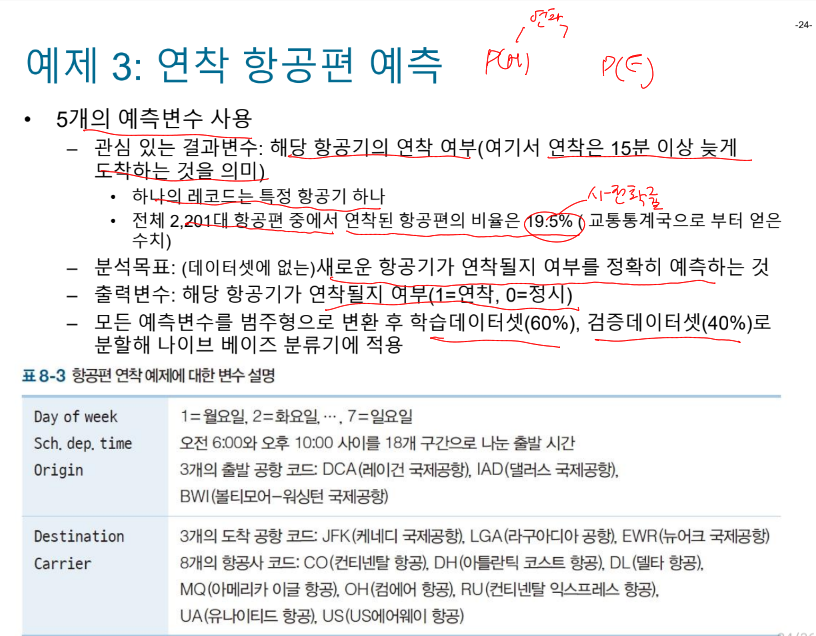

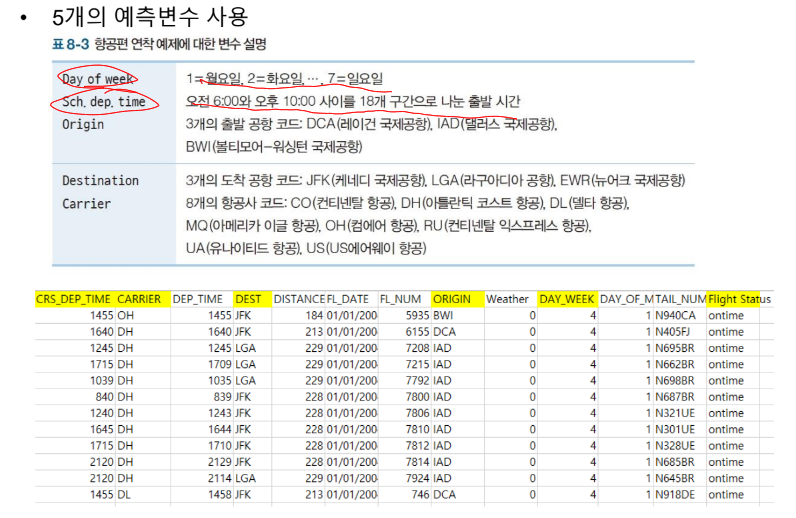

In [2]:
delays_df = dmba.load_data('FlightDelays.csv')

# convert to categorical
delays_df.DAY_WEEK = delays_df.DAY_WEEK.astype('category')
delays_df['Flight Status'] = delays_df['Flight Status'].astype('category')

# create hourly bins departure time
delays_df.CRS_DEP_TIME = [round(t / 100) for t in delays_df.CRS_DEP_TIME]
delays_df.CRS_DEP_TIME = delays_df.CRS_DEP_TIME.astype('category')

predictors = ['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER']
outcome = 'Flight Status'

X = pd.get_dummies(delays_df[predictors])
y = delays_df['Flight Status']
classes = list(y.cat.categories)

# split into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.40, random_state=1)

# run naive Bayes
delays_nb = MultinomialNB(alpha=0.01)
delays_nb.fit(X_train, y_train)

# predict probabilities
predProb_train = delays_nb.predict_proba(X_train)
predProb_valid = delays_nb.predict_proba(X_valid)

# predict class membership
y_valid_pred = delays_nb.predict(X_valid)
y_train_pred = delays_nb.predict(X_train)

In [3]:
X

,DAY_WEEK_1,DAY_WEEK_2,DAY_WEEK_3,DAY_WEEK_4,DAY_WEEK_5,DAY_WEEK_6,DAY_WEEK_7,CRS_DEP_TIME_6,CRS_DEP_TIME_7,CRS_DEP_TIME_8,...,DEST_JFK,DEST_LGA,CARRIER_CO,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US
0,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2197,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2198,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2199,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [4]:
# split the original data frame into a train and test using the same random_state
train_df, valid_df = train_test_split(delays_df, test_size=0.4, random_state=1)

pd.set_option('display.precision', 4)
# probability of flight status
print(train_df['Flight Status'].value_counts() / len(train_df))
print()

for predictor in predictors:
    # construct the frequency table
    df = train_df[['Flight Status', predictor]]
    freqTable = df.pivot_table(index='Flight Status', columns=predictor, aggfunc=len)

    # divide each row by the sum of the row to get conditional probabilities
    propTable = freqTable.apply(lambda x: x / sum(x), axis=1)
    print(propTable)
    print()
pd.reset_option('display.precision')

Flight Status
ontime     0.8023
delayed    0.1977
Name: count, dtype: float64

DAY_WEEK            1       2       3       4       5      6       7
Flight Status                                                       
delayed        0.1916  0.1494  0.1149  0.1264  0.1877  0.069  0.1609
ontime         0.1246  0.1416  0.1445  0.1794  0.1690  0.136  0.1048

CRS_DEP_TIME        6       7       8       9      10      11      12      13  \
Flight Status                                                                   
delayed        0.0345  0.0536  0.0651  0.0192  0.0307  0.0115  0.0498  0.0460   
ontime         0.0623  0.0633  0.0850  0.0567  0.0519  0.0340  0.0661  0.0746   

CRS_DEP_TIME       14      15      16      17      18      19      20      21  
Flight Status                                                                  
delayed        0.0383  0.2031  0.0728  0.1533  0.0192  0.0996  0.0153  0.0881  
ontime         0.0576  0.1171  0.0774  0.1001  0.0349  0.0397  0.0264  0.0529  

C:\Users\sdh05\AppData\Local\Temp\ipykernel_32036\1770188515.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  freqTable = df.pivot_table(index='Flight Status', columns=predictor, aggfunc=len)
C:\Users\sdh05\AppData\Local\Temp\ipykernel_32036\1770188515.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  freqTable = df.pivot_table(index='Flight Status', columns=predictor, aggfunc=len)
C:\Users\sdh05\AppData\Local\Temp\ipykernel_32036\1770188515.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  fr

DEST              EWR     JFK     LGA
Flight Status                        
delayed        0.3793  0.1992  0.4215
ontime         0.2663  0.1558  0.5779

CARRIER            CO      DH      DL      MQ      OH      RU      UA      US
Flight Status                                                                
delayed        0.0575  0.3142  0.0958  0.2222  0.0077  0.2184  0.0153  0.0690
ontime         0.0349  0.2295  0.2040  0.1171  0.0104  0.1690  0.0170  0.2181



C:\Users\sdh05\AppData\Local\Temp\ipykernel_32036\1770188515.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  freqTable = df.pivot_table(index='Flight Status', columns=predictor, aggfunc=len)


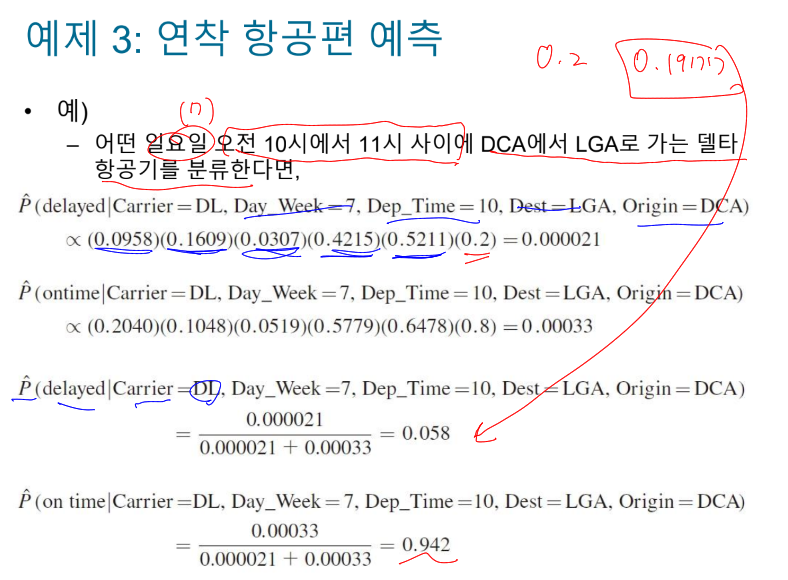

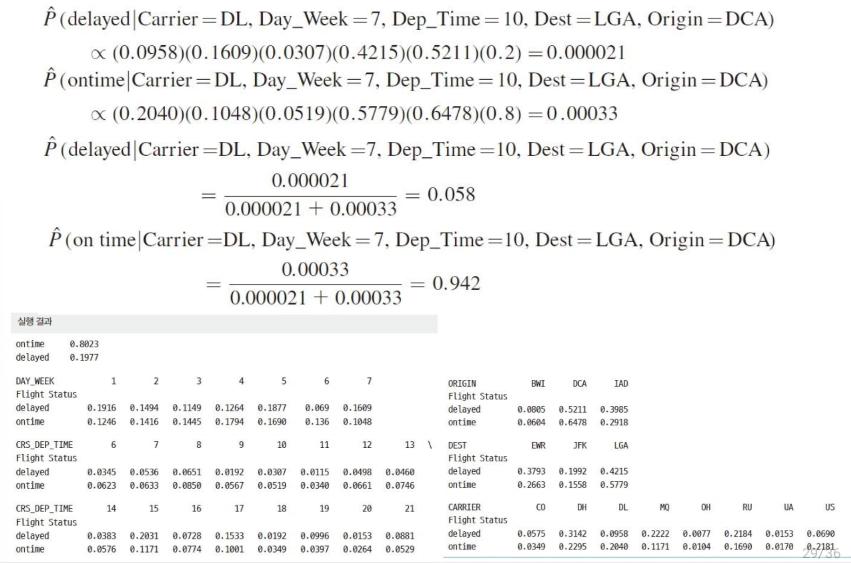

In [5]:
# P(delayed | Carrier = DL, Day_Week = 7, Dep_Time = 10, Dest = LGA, Origin = DCA)
P_hat_delayed = 0.0958 * 0.1609 * 0.0307 * 0.4215 * 0.5211 * 0.1977
# P(ontime | Carrier = DL, Day_Week = 7, Dep_Time = 10, Dest = LGA, Origin = DCA)
P_hat_ontime = 0.2040 * 0.1048 * 0.0519 * 0.5779 * 0.6478 * 0.8023
print('P_hat_delayed ~ ', P_hat_delayed)
print('P_hat_ontime ~ ', P_hat_ontime)

print('P(delayed|...) = ', P_hat_delayed / (P_hat_delayed + P_hat_ontime))
print('P(ontime|...) = ', P_hat_ontime / (P_hat_delayed + P_hat_ontime))

P_hat_delayed ~  2.0548742506526157e-05
P_hat_ontime ~  0.00033326464123921066
P(delayed|...) =  0.05807791183301656
P(ontime|...) =  0.9419220881669834


In [6]:
# Subset a specific set
df = pd.concat([pd.DataFrame({'actual': y_valid, 'predicted': y_valid_pred}),
                pd.DataFrame(predProb_valid, index=y_valid.index)], axis=1)
mask = ((X_valid.CARRIER_DL == 1) & (X_valid.DAY_WEEK_7 == 1) & (X_valid.CRS_DEP_TIME_10 == 1) &
        (X_valid.DEST_LGA == 1) & (X_valid.ORIGIN_DCA == 1))

print(df[mask])

      actual predicted         0         1
1225  ontime    ontime  0.057989  0.942011


In [7]:
classificationSummary(y_train, y_train_pred, class_names=classes)

print()

classificationSummary(y_valid, y_valid_pred, class_names=classes)

Confusion Matrix (Accuracy 0.7955)

        Prediction
 Actual delayed  ontime
delayed      52     209
 ontime      61     998

Confusion Matrix (Accuracy 0.7821)

        Prediction
 Actual delayed  ontime
delayed      26     141
 ontime      51     663


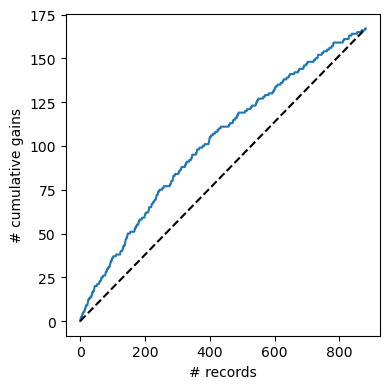

In [8]:
df = pd.DataFrame({'actual': 1 - y_valid.cat.codes, 'prob': predProb_valid[:, 0]})
df = df.sort_values(by=['prob'], ascending=False).reset_index(drop=True)

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
gainsChart(df.actual, ax=ax)

plt.tight_layout()
plt.show()

## 나이브 베이즈 분류
* 장점
    * 단순성, 계산 효율성, 좋은 분류성능, 범주형 변수 처리

* 단점
    * 많은 데이터 필요
    * 값이 0일 확률 처리: 라플라스 평활화(laplace smooting)
    * 경향(클래스 소속 확률)에는 적합하지 않음

## 스팸 필터링
1. 사람들이 대규모의 이메일을 검토해 "스팸" 이나 "비스팸"으로 분류하고, 이 분류를 바탕으로 대규모의 동일한 수에 해당하는 스팸 이메일과 비스팸 이메일을 선정한다. 이것이 학습 데이터가 된다.
2. 이메일은 수 천개의 단어로 구성되는데, 각 단어에 대해서 스팸 데이터셋에 나타나는빈도와 비스팸 데이터셋에 나타나는 빈도를 계산한다. 이 빈도를 추정확률로 변환한다. (즉, '무료'라는 단어가 스팸 이메일 1000개 중 500개에서 나타나고, 비스팸 이메일 1000개 중 100개에서만 나타난다면, 스팸 이메일에서 '무료'라는 단어가 나올 확률은 0.5이고, 비스팸 이메일에서 '무료'라는 단어가 나올 확률은 0.1임)
3. 스팸과 비스팸을 분류하려는 새로운 메시지에 있는 유일한 단어가 '무료'라면, '무료'가 나왔을 때 메시지가 스팸일 베이지안 사후 확률이 0.5/(0.5+1), 즉 5/6이기 때문에 해당 메시지는 스팸으로 분류될 것이다.
4. 물론, 이메일 메시지에는 훨씬 많은 단어들이 있다. 각 단어에 대해 단계2에서 설명할 확률을 계산하여 서로 곱하고, 식8.3을 사용해 각 클래스에 속할 나이브 베이즈 확률로 결정한다. 단순한 버전에서 클래스 소속도(스팸이나 비스팸)는 확률이 더 큰 것으로 결정된다.
5. 좀 더 유연한 해석에서는 "스팸"과 "비스팸" 확률 사이의 비율이 작업자가 컷오프 임곗값을 설정/변경할 수 있는 점수로 취급되어, 이 값보다 큰 것은 모두 스팸으로 분류된다.
6. 사용자는 수신된 메시지를 스팸이나 비스팸으로 분류한 후 그것들을 학습 데이터베이스에 추가함으로써 개인적인 학습 데이터베이스를 구축할 수 있다. 어떤 사람에게는 스팸인 메시지가 다른 사람에게는 중요한 메시지일 수도 있다.